In [294]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, date

# Forecasting Monte Carlo Simulation

## Past data

In [295]:
data = pd.read_csv(r'./past_delivery_data_2.csv')
data

,Item ID,Start Date,End Date
0,PBI-001,2024-02-12,2024-02-21
1,PBI-002,2024-01-29,2024-02-09
2,PBI-003,2024-03-19,2024-03-29
3,PBI-004,2024-01-01,2024-01-10
4,PBI-005,2024-01-12,2024-01-19
5,PBI-006,2024-01-05,2024-01-15
6,PBI-007,2024-02-20,2024-02-28
7,PBI-008,2024-01-08,2024-01-23
8,PBI-009,2024-01-24,2024-02-11
9,PBI-010,2024-01-15,2024-01-22


### Cycle Time

In [296]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])
data['Cycle Time'] = (data['End Date'] - data['Start Date']).dt.days

data

,Item ID,Start Date,End Date,Cycle Time
0,PBI-001,2024-02-12,2024-02-21,9
1,PBI-002,2024-01-29,2024-02-09,11
2,PBI-003,2024-03-19,2024-03-29,10
3,PBI-004,2024-01-01,2024-01-10,9
4,PBI-005,2024-01-12,2024-01-19,7
5,PBI-006,2024-01-05,2024-01-15,10
6,PBI-007,2024-02-20,2024-02-28,8
7,PBI-008,2024-01-08,2024-01-23,15
8,PBI-009,2024-01-24,2024-02-11,18
9,PBI-010,2024-01-15,2024-01-22,7


### Percentile

In [297]:
percentiles = [50, 70, 85, 99]
completion_date_percentiles = [data['Cycle Time'].quantile(p / 100) for p in percentiles]

start_date = date.today()

# Create a DataFrame to display the percentiles and their values
percentile_values = pd.DataFrame({
    "Percentile": percentiles,
    "Cycle Time (Days)": completion_date_percentiles
})

percentile_values['Forecasted Completion Date for One Item'] = percentile_values['Cycle Time (Days)'].apply(lambda days: start_date + timedelta(days=days))

# Display the DataFrame
percentile_values

,Percentile,Cycle Time (Days),Forecasted Completion Date for One Item
0,50,9.00,2024-11-23
1,70,11.00,2024-11-25
2,85,13.00,2024-11-27
3,99,19.02,2024-12-03


### Cycle Time Scatterplot

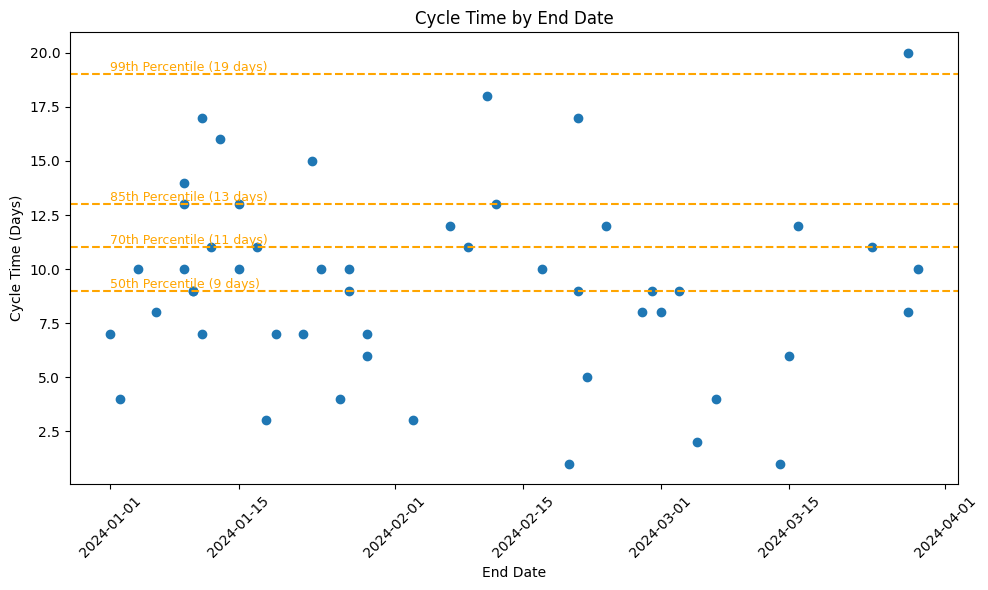

In [298]:
plt.figure(figsize=(10, 6))
plt.scatter(data['End Date'], data['Cycle Time'])
plt.xlabel('End Date')
plt.ylabel('Cycle Time (Days)')
plt.title('Cycle Time by End Date')


for p, value in zip(percentiles, completion_date_percentiles):
    plt.axhline(y=value, color='orange', linestyle='--', label=f'{p}th Percentile ({int(value)} days)')
    plt.text(data['End Date'].min(), value, f'{p}th Percentile ({int(value)} days)',
             va='bottom', ha='left', color='orange', fontsize=9)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cycle Time Histogram

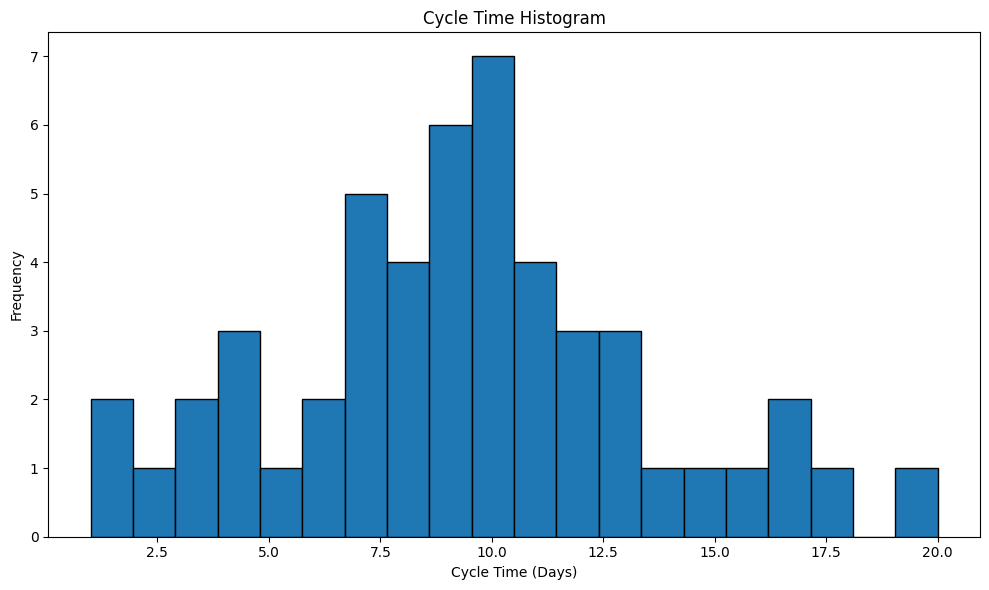

In [299]:
plt.figure(figsize=(10, 6))
plt.hist(data['Cycle Time'], bins=20, edgecolor='black')
plt.xlabel('Cycle Time (Days)')
plt.ylabel('Frequency')
plt.title('Cycle Time Histogram')
plt.tight_layout()
plt.show()

### Throughput



In [300]:
date_range = pd.date_range(start=data['End Date'].min(), end=data['End Date'].max())

throughput = pd.DataFrame({
    "Date": date_range
})

throughput['Throughput'] = throughput['Date'].apply(lambda date: data[data['End Date'] == date].shape[0])

throughput

,Date,Throughput
0,2024-01-01,1
1,2024-01-02,1
2,2024-01-03,0
3,2024-01-04,1
4,2024-01-05,0
...,...,...
84,2024-03-25,0
85,2024-03-26,0
86,2024-03-27,0
87,2024-03-28,2


## Monte Carlo Simulations : When will it be done ?

In [301]:
# Define simulation parameters.This is used by the two simulations
num_items = 1 # items to deliver
num_simulations = 1000  # number of Monte Carlo runs
percentiles = [50, 70, 85, 99]
start_date = date.today()

def compute_percentiles(simulation_results, percentiles):
    completion_date_percentiles = [simulation_results['Completion Date'].quantile(p / 100) for p in percentiles]

    # Create a DataFrame to display the percentiles and their values
    return pd.DataFrame({
        "Percentile": percentiles,
        "Completion Date": completion_date_percentiles
    })


def plot_simulation_histogram(simulation_results, simulation_percentiles):
    # Plot histogram of completion dates
    plt.figure(figsize=(10, 6))
    plt.hist(simulation_results['Completion Date'], bins=50, edgecolor='black')
    plt.xlabel('Completion Date')
    plt.ylabel('Frequency')
    plt.title('Completion Date Histogram')

    # Add vertical lines for percentiles
    for p, date in zip(simulation_percentiles['Percentile'], simulation_percentiles['Completion Date']):
        plt.axvline(x=date, color='orange', linestyle='--', label=f'{p}th Percentile: {date}')

    # Display legend
    plt.legend()

    # Format x-axis to show dates
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
    plt.tight_layout()
    plt.show()


### Monte Carlo Simulation using Throughput

As advised in [When Will It Be Done?](https://leanpub.com/whenwillitbedone).

In [302]:
simulation_results = []
for _ in range(num_simulations):
    items_remaining = num_items
    current_date = start_date

    while items_remaining > 0:
        # Randomly select a throughput value from the historical data
        daily_throughput = throughput['Throughput'].sample(1).values[0]
        
        # Decrease the number of items remaining
        items_remaining -= daily_throughput

        # Move to the next day
        current_date += timedelta(days=1)

    # Record the completion date for this simulation run
    simulation_results.append(current_date)

# Convert simulation results to a DataFrame
simulation_throughput = pd.DataFrame(simulation_results, columns=['Completion Date'])

# Display the results
simulation_throughput


,Completion Date
0,2024-11-15
1,2024-11-16
2,2024-11-15
3,2024-11-15
4,2024-11-16
...,...
995,2024-11-15
996,2024-11-15
997,2024-11-15
998,2024-11-19


In [303]:
# Display the DataFrame
sim_throughput_percentiles = compute_percentiles(simulation_throughput, percentiles)
sim_throughput_percentiles

,Percentile,Completion Date
0,50,2024-11-16
1,70,2024-11-16
2,85,2024-11-18
3,99,2024-11-22


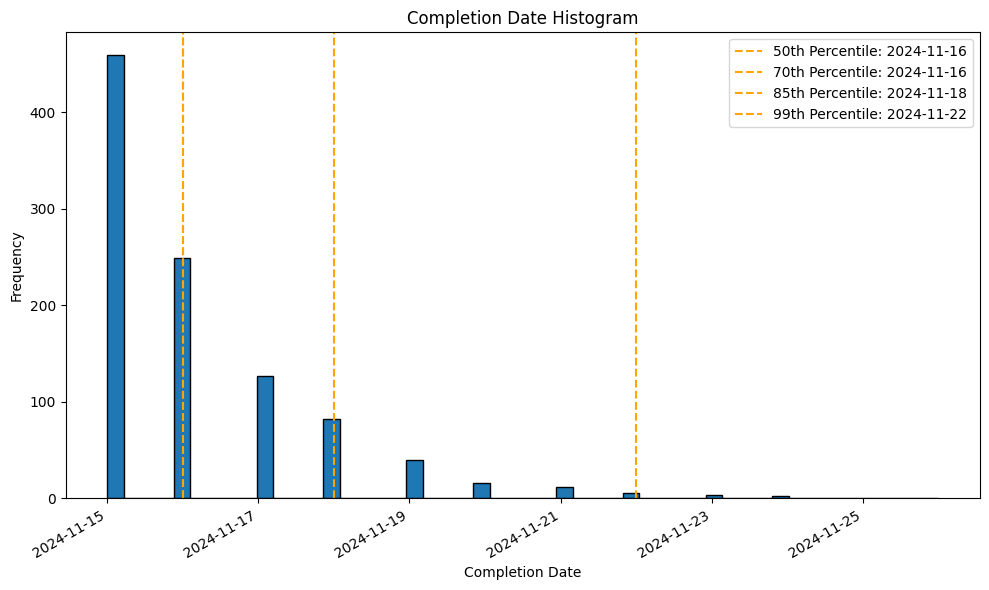

In [304]:
plot_simulation_histogram(simulation_throughput, sim_throughput_percentiles)

## Monte Carlo Simulation using Cycle Time

I wanted to see if we get the same forcast using the Cycle Time instead of the Throughput. We don't.
I don't understand why.

Or maybe:
When using cycle for the simulation you pretend that we start a new item only after one is terminated. This is pretending that we have a WIP limit of 1. The simulation based on Throughput doesn't make that assumption: multiple items can be worked on at the same time, and even multiple items can be terminated on the same day. 
Am I right? I don't know.


In [305]:
simulation_results = []
for _ in range(num_simulations):
    items_remaining = num_items
    current_date = start_date

    while items_remaining > 0:
        # Randomly select a throughput value from the historical data
        item_cycle_time = int(data['Cycle Time'].sample(1).values[0])

        # Decrease the number of items remaining
        items_remaining -= 1

        # Move to the next day
        current_date += timedelta(days=item_cycle_time)

    # Record the completion date for this simulation run
    simulation_results.append(current_date)

# Convert simulation results to a DataFrame
simulation_cycle_time = pd.DataFrame(simulation_results, columns=['Completion Date'])

# Display the results
simulation_cycle_time


,Completion Date
0,2024-11-18
1,2024-11-23
2,2024-11-18
3,2024-11-25
4,2024-11-25
...,...
995,2024-11-28
996,2024-11-16
997,2024-11-21
998,2024-11-27


In [306]:
sim_cycle_time_percentiles = compute_percentiles(simulation_cycle_time, percentiles)
sim_cycle_time_percentiles

,Percentile,Completion Date
0,50,2024-11-23
1,70,2024-11-25
2,85,2024-11-27
3,99,2024-12-04


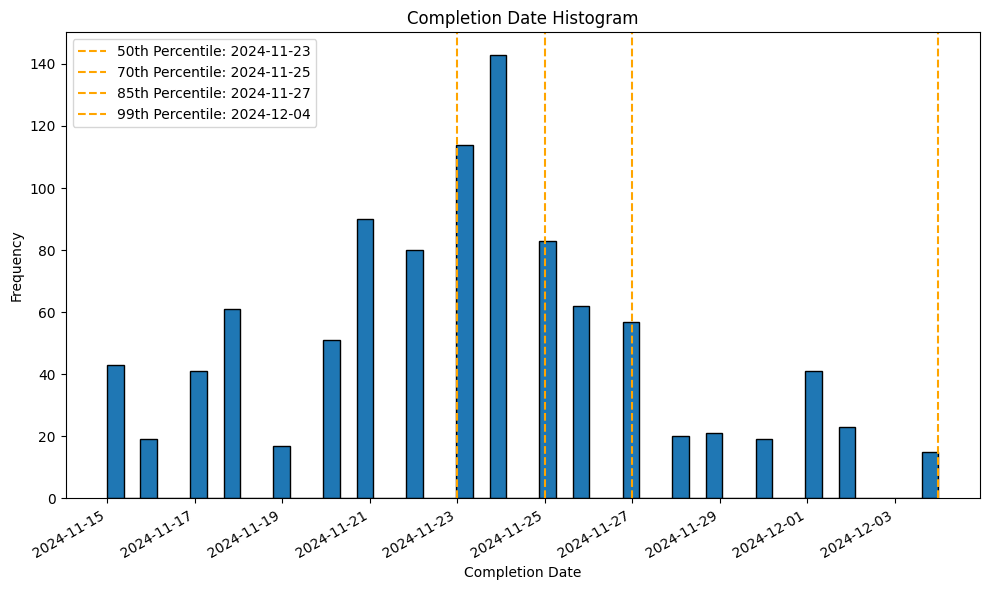

In [307]:
plot_simulation_histogram(simulation_cycle_time, sim_cycle_time_percentiles)

## Monte Carlo Simulation : How many can I get done ?

In [310]:
simulation_results = []
for _ in range(num_simulations):
    current_date = start_date
    end_date = start_date + timedelta(days=30) ## How many can I get done in 30 days?

    items_completed = 0
    while current_date < end_date:
        # Randomly select a throughput value from the historical data
        daily_throughput = throughput['Throughput'].sample(1).values[0]

        # Decrease the number of items remaining
        items_completed += daily_throughput

        # Move to the next day
        current_date += timedelta(days=1)

    # Record the completion date for this simulation run
    simulation_results.append(items_completed)

# Convert simulation results to a DataFrame
simulation_how_throughput = pd.DataFrame(simulation_results, columns=['Completed Items'])

# Display the results
simulation_how_throughput


,Completed Items
0,14
1,19
2,18
3,16
4,11
...,...
995,16
996,20
997,26
998,25


In [316]:
completion_percentiles = [1, 15, 30, 50]
completion_items_percentiles = [simulation_how_throughput['Completed Items'].quantile(p / 100) for p in completion_percentiles]

# Create a DataFrame to display the percentiles and their values
sim_how_percentiles = pd.DataFrame({
    "Percentile": [100 - p for p in completion_percentiles],
    "Completed Items": completion_date_percentiles
})

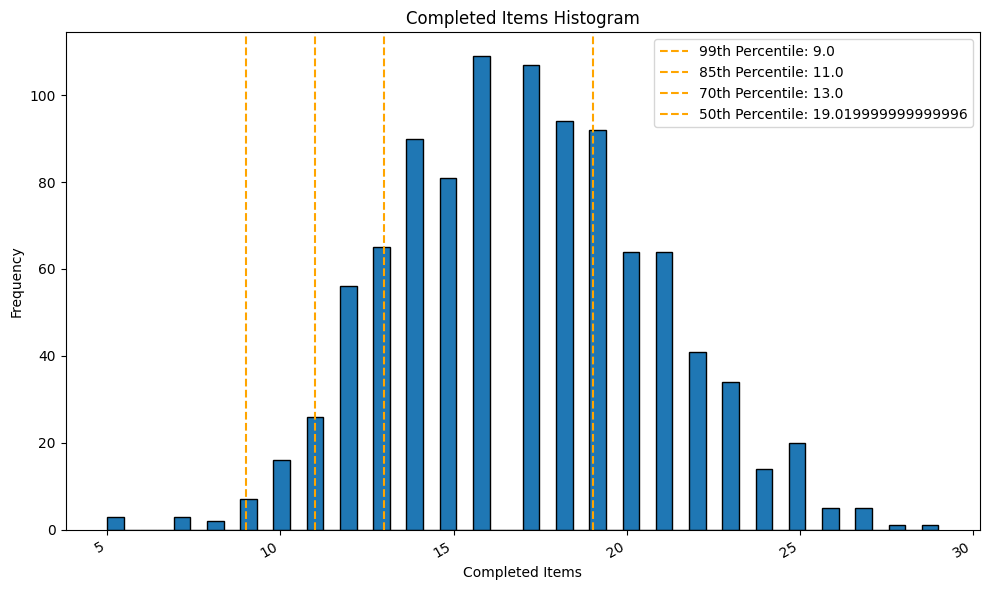

In [318]:
 # Plot histogram of completion dates
plt.figure(figsize=(10, 6))
plt.hist(simulation_how_throughput['Completed Items'], bins=50, edgecolor='black')
plt.xlabel('Completed Items')
plt.ylabel('Frequency')
plt.title('Completed Items Histogram')

# Add vertical lines for percentiles
for p, date in zip(sim_how_percentiles['Percentile'], sim_how_percentiles['Completed Items']):
    plt.axvline(x=date, color='orange', linestyle='--', label=f'{p}th Percentile: {date}')

# Display legend
plt.legend()

# Format x-axis to show dates
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.tight_layout()
plt.show()